XGBoosting Method using decision Trees - 

In [50]:
import numpy as np 
import pandas as pd 
# import seaborn as sb 
# import matplotlib.pyplot as plt 

# from sklearn import tree 
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn.ensemble import RandomForestClassifier 
 
import xgboost as xgb 
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix 

import nbformat 
from IPython import get_ipython 

In [51]:
# %run "../Data_Preprocessing/data_preprocess_dtcls.ipynb" 

with open("../Data_Preprocessing/data_preprocess_dtcls.ipynb", "r", encoding="utf-8") as f:
    ntb = nbformat.read(f, as_version = 4) 

ipython = get_ipython() 

for cell in ntb.cells:
    if cell.cell_type == "code":
        print(cell.source) 

        if ("mov_cls_cleaned" in cell.source or "mov_cls" in cell.source):
            ipython.run_cell(cell.source, silent=True) 
            # ipython.run_cell_async(cell.source, silent=True) 

try:
    print("Movies Clean Data : ")
    print(mov_cls_cleaned.head())   # type: ignore 

except NameError as e:
    print(f"Variable not found: {e}")

import pandas as pd 
# import numpy as np 
# import seaborn as sb 
mov_cls = pd.read_csv('../Datasets/Movie_classification.csv', header=0)       # column tags are at zeroth index 
mov_cls 
mov_cls.shape 
mov_cls.describe() 
mov_cls.info() 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing_expense    506 non-null    float64
 1   Production_expense   506 non-null    float64
 2   Multiplex_coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  

In [52]:
mov_cls_cleaned     # type: ignore 

,Marketing_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,...,186.96,243.584,27,561,44800,0,0,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,...,132.24,263.296,20,600,41200,0,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,...,109.56,243.824,31,576,47800,0,0,1,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,...,158.80,303.520,47,607,44000,0,1,1,0,0


In [53]:
mov_cls_cleaned.corr()      # type: ignore 

,Marketing_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
Marketing_expense,1.000000,0.406583,-0.420972,-0.219247,0.352734,0.380050,0.379813,0.380069,0.376462,-0.184985,...,0.025694,0.013518,0.059204,0.383298,-0.389582,-0.013417,-0.086805,0.066796,-0.016894,-0.037123
Production_expense,0.406583,1.000000,-0.763651,-0.391676,0.644779,0.706481,0.707956,0.707566,0.705819,-0.251565,...,0.015773,-0.000839,0.055810,0.707559,-0.484754,-0.024404,-0.115401,0.086958,-0.026590,-0.098976
Multiplex_coverage,-0.420972,-0.763651,1.000000,0.302188,-0.731470,-0.768589,-0.769724,-0.769157,-0.764873,0.145555,...,0.035515,0.004882,-0.092104,-0.915495,0.429300,-0.004017,0.073903,-0.068554,0.046393,0.037772
Budget,-0.219247,-0.391676,0.302188,1.000000,-0.240265,-0.208464,-0.203981,-0.201907,-0.205397,0.232361,...,0.040439,0.030674,-0.064694,-0.282796,0.696304,-0.027148,0.163774,-0.052579,-0.004195,0.046251
Movie_length,0.352734,0.644779,-0.731470,-0.240265,1.000000,0.746904,0.746493,0.747021,0.746707,-0.217830,...,-0.019820,0.009380,0.075198,0.673896,-0.377999,0.016291,0.005101,0.092693,0.003452,-0.088609
Lead_ Actor_Rating,0.380050,0.706481,-0.768589,-0.208464,0.746904,1.000000,0.997905,0.997735,0.994073,-0.169978,...,0.038050,0.014463,0.036794,0.706331,-0.251355,-0.035309,-0.025208,0.044592,-0.035171,-0.030763
Lead_Actress_rating,0.379813,0.707956,-0.769724,-0.203981,0.746493,0.997905,1.000000,0.998097,0.994003,-0.165992,...,0.037975,0.010239,0.038005,0.708257,-0.249459,-0.040356,-0.020056,0.046974,-0.038965,-0.030566
Director_rating,0.380069,0.707566,-0.769157,-0.201907,0.747021,0.997735,0.998097,1.000000,0.994126,-0.166638,...,0.035881,0.010077,0.041470,0.709364,-0.246650,-0.035768,-0.020195,0.046268,-0.033510,-0.033634
Producer_rating,0.376462,0.705819,-0.764873,-0.205397,0.746707,0.994073,0.994003,0.994126,1.000000,-0.167003,...,0.028695,0.005850,0.032542,0.703518,-0.248200,-0.043612,-0.020022,0.051274,-0.031696,-0.033829
Critic_rating,-0.184985,-0.251565,0.145555,0.232361,-0.217830,-0.169978,-0.165992,-0.166638,-0.167003,1.000000,...,-0.014762,-0.023655,-0.049797,-0.128769,0.341288,-0.001084,0.039235,-0.015253,0.057177,-0.037129


Variable split (X, y) : 

In [54]:
X = mov_cls_cleaned.loc[:, mov_cls_cleaned.columns != 'Start_Tech_Oscar']      # type: ignore 
X 

,Marketing_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,186.96,243.584,27,561,44800,0,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,132.24,263.296,20,600,41200,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,109.56,243.824,31,576,47800,0,1,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,158.80,303.520,47,607,44000,1,1,0,0


In [55]:
X.shape 

(506, 20)

In [56]:
y = mov_cls_cleaned['Start_Tech_Oscar']      # type: ignore 
y 

0      1
1      0
2      1
3      1
4      1
      ..
501    0
502    0
503    0
504    0
505    0
Name: Start_Tech_Oscar, Length: 506, dtype: int64

In [57]:
y.shape 

(506,)

Test - Train Split : 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

print(f" X_train size : {X_train.shape} \n X_test size : {X_test.shape} \n y_train size : {y_train.shape} \n y_test size : {y_test.shape}") 

print(f"X_train :\n{X_train}") 
print(f"X_test :\n{X_test}") 
print(f"y_train :\n{y_train}") 
print(f"y_test :\n{y_test}") 

 X_train size : (404, 20) 
 X_test size : (102, 20) 
 y_train size : (404,) 
 y_test size : (102,)
X_train :
     Marketing_expense  Production_expense  Multiplex_coverage     Budget  \
220            27.1618               67.40               0.493  38612.805   
71             23.1752               76.62               0.587  33113.355   
240            22.2658               64.86               0.572  38312.835   
6              21.7658               70.74               0.476  33396.660   
417           538.8120               91.20               0.321  29463.720   
..                 ...                 ...                 ...        ...   
323            25.6784               69.76               0.507  31707.940   
192            21.7328               61.88               0.563  39873.790   
117            23.0196               75.02               0.453  33446.655   
47             24.5854               68.82               0.552  33496.650   
172            22.7828               63.10  

In [59]:
X_train = pd.DataFrame(X_train, columns=list(X.columns))  
X_train 

,Marketing_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,53400,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,43400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,54000,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,45800,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,20800,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,25.6784,69.76,0.507,31707.940,147.8,7.545,7.700,7.550,7.765,8.08,446743,131.40,302.960,25,501,37000,1,1,0,0
192,21.7328,61.88,0.563,39873.790,99.8,6.620,6.830,6.700,6.895,7.96,515199,210.56,225.824,40,448,72800,1,0,1,0
117,23.0196,75.02,0.453,33446.655,156.1,8.615,8.755,8.540,8.595,7.44,454755,189.68,303.072,28,609,38400,0,0,0,0
47,24.5854,68.82,0.552,33496.650,159.0,7.085,7.180,7.125,7.230,7.42,374797,106.64,242.656,44,526,33200,1,0,0,1


In [60]:
y_train = pd.Series(y_train) 
y_train 

220    1
71     1
240    1
6      0
417    1
      ..
323    1
192    0
117    0
47     1
172    0
Name: Start_Tech_Oscar, Length: 404, dtype: int64

Training multiple classification trees using XGBoosting - 

Parameter Tuning -                                                                                                                              
-> General parameters : Guide the overall functioning.  
-> Booster parameters : Guide the individual booster (tree/regression) at each individual step.  
-> Learning Task parameter : Guide the optimization performed.  

In [61]:
# clstree = DecisionTreeClassifier() 
     
xgb_cls = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3, n_jobs=-1)       
xgb_cls.fit(X_train, y_train) 

y_train_prd = xgb_cls.predict(X_train) 
y_test_prd = xgb_cls.predict(X_test) 

In [62]:
y_train_prd 

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,

In [63]:
y_test_prd 

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0])

Model  Performance - 

In [64]:
conf_mtx_trn = confusion_matrix(y_train, y_train_prd) 
print(f"Train Confusion Matrix : \n{conf_mtx_trn}") 

conf_mtx_tst = confusion_matrix(y_test, y_test_prd) 
print(f"Test Confusion Matrix : \n{conf_mtx_tst}") 

Train Confusion Matrix : 
[[186   0]
 [  0 218]]
Test Confusion Matrix : 
[[28 16]
 [21 37]]


In [65]:
acc_sc_trn = accuracy_score(y_train, y_train_prd) 
print(f"Train Accuracy Score : {acc_sc_trn}") 

acc_sc_tst = accuracy_score(y_test, y_test_prd) 
print(f"Test Accuracy Score : {acc_sc_tst}") 

Train Accuracy Score : 1.0
Test Accuracy Score : 0.6372549019607843


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

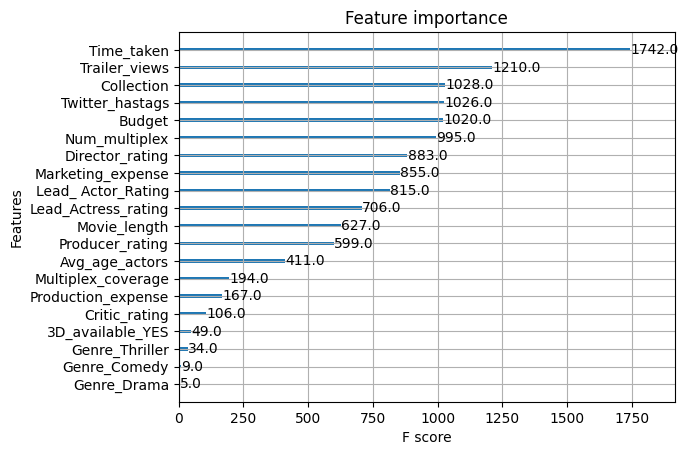

In [66]:
xgb.plot_importance(xgb_cls) 

More hyperparameters usage - 

In [67]:
# rnd_cls = RandomForestClassifier(max_depth=5, random_state=45)  
# xgb_cls2 = XGBClassifier(estimator=rnd_cls, learning_rate=0.2, n_estimators=5000) 

xgb_cls2 = XGBClassifier(gamma=0.3, max_depth=7, learning_rate=0.2, n_estimators=5000, random_state=45)   
xgb_cls2.fit(X_train, y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5000, n_jobs=None,
              num_parallel_tree=None, random_state=45, ...)

In [68]:
conf_mtx_trn = confusion_matrix(y_train, xgb_cls2.predict(X_train)) 
print(f"Train Confusion Matrix : \n{conf_mtx_trn}") 

conf_mtx_tst = confusion_matrix(y_test, xgb_cls2.predict(X_test)) 
print(f"Test Confusion Matrix : \n{conf_mtx_tst}") 

Train Confusion Matrix : 
[[186   0]
 [  0 218]]
Test Confusion Matrix : 
[[27 17]
 [17 41]]


In [69]:
acc_sc_trn = accuracy_score(y_train, xgb_cls2.predict(X_train)) 
print(f"Train Accuracy Score : {acc_sc_trn}") 

acc_sc_tst = accuracy_score(y_test, xgb_cls2.predict(X_test)) 
print(f"Test Accuracy Score : {acc_sc_tst}") 

Train Accuracy Score : 1.0
Test Accuracy Score : 0.6666666666666666


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

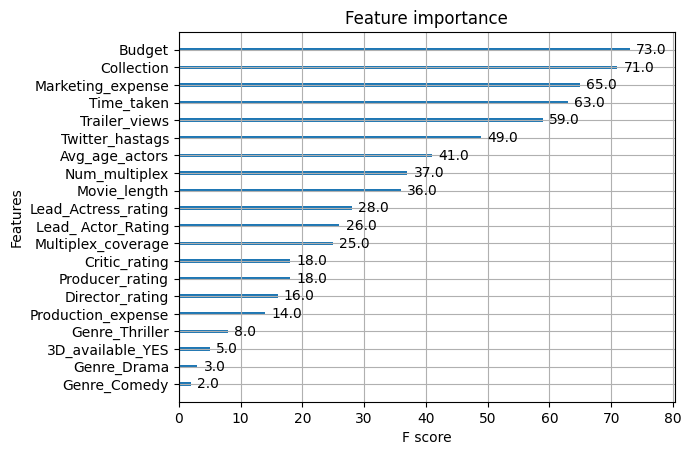

In [70]:
xgb.plot_importance(xgb_cls2) 

---------------

In [71]:
# Split training data to create a validation set
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X, y, test_size=0.2, random_state=50
    # X_train, y_train, test_size=0.2, random_state=50
)

# Initialize XGBoost classifier with early stopping 
# xgb_cls3 = XGBClassifier() 
xgb_cls3 = XGBClassifier(
    random_state=50,
    early_stopping_rounds=10,
    eval_metric='logloss'
)

# Define parameter grid
params_grid = {
    "max_depth": [3, 5, 7, 10],
    "gamma": [0.1, 0.2, 0.3, 0.4],
    "learning_rate": [0.1, 0.2, 0.3, 0.5],
    "subsample": [0.8, 0.9, 0.96],
    "n_estimators": [100, 500, 1000, 2500],
    "colsample_bytree": [0.85, 0.9, 0.95],
    "reg_alpha": [1e-2, 0.1, 1]
}

# Set up GridSearchCV with fit_params for validation data
fit_params = {
    "eval_set": [(X_val, y_val)],
    "verbose": False  # Set to True if you want to see training progress
}

grid_search = GridSearchCV(
    xgb_cls3,
    param_grid=params_grid,
    scoring='accuracy',
    n_jobs=-1, cv=5
)

# Fit the model with validation data
grid_search.fit(X_train_split, y_train_split, **fit_params)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=No...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=50, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.85, 0.9, 0.95],
                         'gamma': [0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 500, 1000, 2500],
                         'reg_alpha': [0.01, 0.1, 1],
                         'subsample': [0.8, 0.9, 0.96]},
             scoring='accuracy')

In [72]:
grid_search.best_params_ 

{'colsample_bytree': 0.85,
 'gamma': 0.4,
 'learning_rate': 0.3,
 'max_depth': 7,
 'n_estimators': 100,
 'reg_alpha': 1,
 'subsample': 0.96}

In [73]:
cv_rf_cls = grid_search.best_estimator_ 
cv_rf_cls 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.4, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=50, ...)

In [74]:
conf_mtx_trn = confusion_matrix(y_train, cv_rf_cls.predict(X_train)) 
print(f"Train Confusion Matrix : \n{conf_mtx_trn}") 

conf_mtx_tst = confusion_matrix(y_test, cv_rf_cls.predict(X_test)) 
print(f"Test Confusion Matrix : \n{conf_mtx_tst}") 

Train Confusion Matrix : 
[[170  16]
 [ 23 195]]
Test Confusion Matrix : 
[[40  4]
 [ 5 53]]


In [75]:
acc_sc_trn = accuracy_score(y_train, cv_rf_cls.predict(X_train)) 
print(f"Train Accuracy Score : {acc_sc_trn}") 

acc_sc_tst = accuracy_score(y_test, cv_rf_cls.predict(X_test)) 
print(f"Test Accuracy Score : {acc_sc_tst}") 

Train Accuracy Score : 0.9034653465346535
Test Accuracy Score : 0.9117647058823529


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

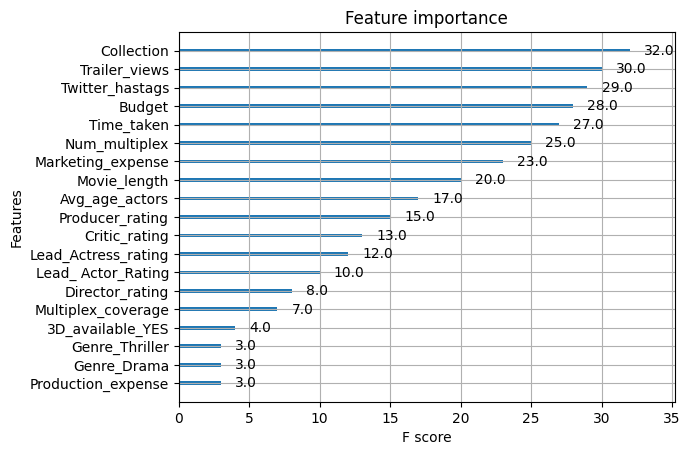

In [76]:
xgb.plot_importance(cv_rf_cls) 